In [1]:
# Import numpy for math operations and containers.
# Import matplotlib.pyplot for visual plotting.

import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Define training data.

                       # [age, height cm]
trainingFeatures = np.array([[5, 50],
                            [10, 50],
                            [15, 50],
                            [20, 50],
                            [25, 50],
                            [10, 100],
                            [10, 150],
                            [10, 175],
                            [15, 100],
                            [15, 175],
                            [15, 200],
                            [17, 150],
                            [17, 175],
                            [17, 200],
                            [20, 100],
                            [20, 150],
                            [20, 175],
                            [20, 200],
                            [22, 125],
                            [25, 50],
                            [25, 100],
                            [25, 175],
                            [25, 200]])

                     # [bIsManly]
trainingResults = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

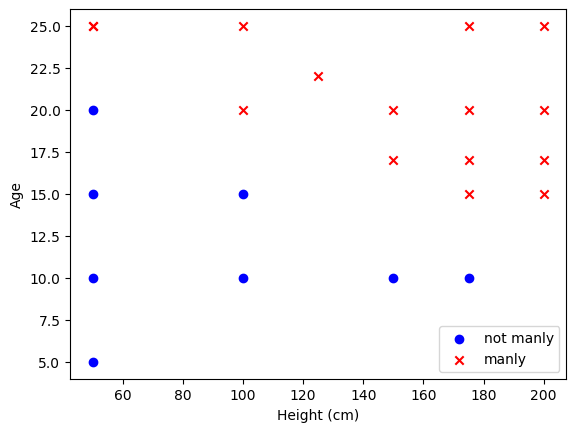

In [15]:
# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

plt.scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
plt.scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

plt.ylabel('Age')
plt.xlabel('Height (cm)')
plt.legend(loc='lower right')

plt.show()

In [16]:
# Define sigmoid function.

def sigmoid(z):
    # input :
    # z [scalar] - Parameter for the sigmoid function.
    # returns :
    # [scalar] - Result of sigmoid function.
    
    return 1 / (1 + np.exp(-1 * z))

In [17]:
# Test the sigmoid.

print(f'{sigmoid(0)}')
print(f'{sigmoid(1)}')
print(f'{sigmoid(-1)}')
print(f'{sigmoid(0.5)}')
print(f'{sigmoid(2)}')
print(f'{sigmoid(-2)}')
print(f'{sigmoid(5555)}')
print(f'{sigmoid(-5555)}')

0.5
0.7310585786300049
0.2689414213699951
0.6224593312018546
0.8807970779778823
0.11920292202211755
1.0
0.0


In [18]:
# Define prediction function.

def predict(X, w, b):
    # input :
    # X [ndarray : Shape(m,)] - Data with m features to predict result for.
    # w [ndarray : Shape(m,)] - Weights with m values required for proper prediction.
    # b [scalar] - Bias required for proper prediction.
    # returns:
    # [scalar] - Predicted outcome (1 - true, 0 - false).
    
    dotPlusb = np.dot(X, w) + b
    pred = sigmoid(dotPlusb)
    
    return pred

In [19]:
# Test prediciton with some random weights and bias.

print(f'{predict([19, 177], [0.888, 0.111], 1.5)}')
print(f'{predict([10, 122], [0.888, 0.111], 1.5)}')

1.0
0.9999999999591862


In [20]:
# Define loss function.

def loss(x, w, b, y):
    # input :
    # x [ndarray : Shape(m,)] - Data with m features to predict loss for.
    # w [ndarray : Shape(m,)] - Weights with m values used in finding loss for this given x data.
    # b [scalar] - Bias used in finding loss for this given x data.
    # y [scalar] - Proper result needed for calculating loss for given x.
    # returns:
    # [scalar] - Amount of loss for given x with given w and b.
    
    return (-1 * y * np.log(predict(x, w, b))) - ((1 - y) * np.log(1 - predict(x, w, b)))

In [21]:
# Test loss with some random weights and bias.

print(f'{loss([20, 200], [0.888, 0.111], 1.5, 1.0)}')

nan


In [22]:
# Define cost function.
# It's just a sum of losses divided by number of training examples.
# It's goal is to find how bad are the given weights and bias.

def compute_cost(X, w, b, Y):
    # input :
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns:
    # [scalar] - Cost for given weights and bias.
    
    # Get number of examples.
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        cost += loss(X[i], w, b, Y[i])
        
    cost /= m
    
    return cost

In [23]:
# Test cost with some random weights and bias.

print(f'{compute_cost(trainingFeatures, [0.5, 0.5], 2.5, trainingResults)}')

nan


In [24]:
# Define gradient computation.

def compute_gradient(X, w, b, Y):
    # input:
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns: 
    # dj_dw [ndarray : Shape(n,)] - Gradient of current weights.
    # dj_db [scalar] - Gradient of current bias.
    
    # Get the shape of training data.
    m,n = X.shape
    
    # Init n weights with zeros.
    dj_dw = np.zeros((n,))
    
    # Init bias with 0.
    dj_db = 0
    
    # Loop over all examples.
    for i in range(m):
        
        err = predict(X[i], w, b) - Y[i]
        
        # Loop over all features.
        for j in range(n):
            dj_dw[j] += err * X[i, j]
            
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db
    

In [25]:
# Test single gradient with some random weights and bias.

print(f'{compute_gradient(trainingFeatures, [0.5, 0.5], 2.5, trainingResults)}')

(array([ 4.13043478, 31.52173913]), 0.3478260869565173)


In [26]:
# Define training function.

def train_logistic_regression(X, Y, w_start, b_start, alpha, num_iter):
    # inputs:
    # X [ndarray : Shape(m,n)] - Training data.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # w_start [ndarray : Shape(n,)] - Starting weights.
    # b_start [scalar] - Starting bias.
    # alpha [scalar] - Step size.
    # num_iter [scalar] - Number of iterations.
    # returns:
    # weights [ndarray : Shape(n,)] - Trained weights for n-features.
    # bias [scalar] - Trained bias.
    # cost_history [ndarray : Shape(num_iter,)] - History of cost during training.
    
    weights = w_start
    bias = b_start
    cost_history = np.zeros((num_iter,))
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, weights, bias, Y)
        
        weights -= alpha * dj_dw
        bias -= alpha * dj_db
        cost_history[i] = compute_cost(X, weights, bias, Y)
        
        if(i % 100 == 0):
            print(f'Cost at iteration {i} : {cost_history[i]}')
    
    return weights, bias, cost_history
    

In [27]:
# Do the training.

trained_weights, trained_bias, cost_history = train_logistic_regression(trainingFeatures, trainingResults, [0.5, 0.5], 1.0, 0.0002, 2000)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : nan
Cost at iteration 100 : 1.1239980355424017
Cost at iteration 200 : 1.0728948923601969
Cost at iteration 300 : 1.023829075436483
Cost at iteration 400 : 0.9770370784625675
Cost at iteration 500 : 0.9327718066723282
Cost at iteration 600 : 0.8912975827236077
Cost at iteration 700 : 0.852882117586887
Cost at iteration 800 : 0.8177844849743793
Cost at iteration 900 : 0.786238029782185
Cost at iteration 1000 : 0.758427440109999
Cost at iteration 1100 : 0.7344605031528025
Cost at iteration 1200 : 0.7143379027511001
Cost at iteration 1300 : 0.6979284583779858
Cost at iteration 1400 : 0.6849602049597545
Cost at iteration 1500 : 0.6750360244610285
Cost at iteration 1600 : 0.6676744240370949
Cost at iteration 1700 : 0.6623651980749635
Cost at iteration 1800 : 0.6586235029878728
Cost at iteration 1900 : 0.6560285205595344
found weights: [ 0.04046117 -0.00342558], found bias: 0.940800797709645


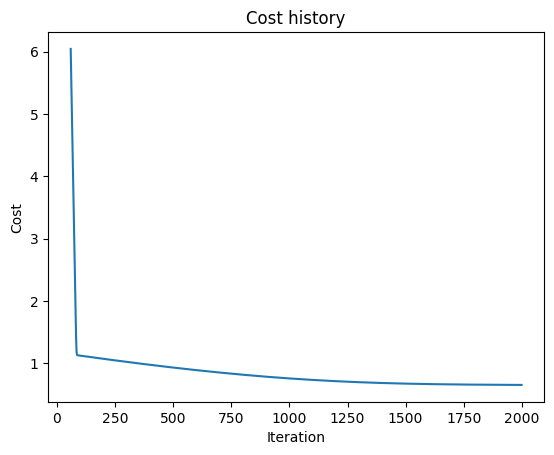

In [28]:
# Plot the cost history.

x = np.arange(cost_history.shape[0])

plt.plot(x, cost_history)

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost history')

plt.show()

In [29]:
# Predict results for training data.

m = trainingFeatures.shape[0]
predictions = np.zeros((m,))

for i in range(m):
    predictions[i] = predict(trainingFeatures[i], trained_weights, trained_bias)
    print(f'prediction for age ({trainingFeatures[i,0]}) and height ({trainingFeatures[i,1]}cm) : {predictions[i]}')    



prediction for age (5) and height (50cm) : 0.725483671708821
prediction for age (10) and height (50cm) : 0.7638913836994318
prediction for age (15) and height (50cm) : 0.7984185634130935
prediction for age (20) and height (50cm) : 0.8290267590164337
prediction for age (25) and height (50cm) : 0.8558266223740347
prediction for age (10) and height (100cm) : 0.7316195054330267
prediction for age (10) and height (150cm) : 0.6966880683662722
prediction for age (10) and height (175cm) : 0.6782926629509475
prediction for age (15) and height (100cm) : 0.7694415705908021
prediction for age (15) and height (175cm) : 0.7207615853133394
prediction for age (15) and height (200cm) : 0.7032042185806637
prediction for age (17) and height (150cm) : 0.7530236800296526
prediction for age (17) and height (175cm) : 0.7367539429980601
prediction for age (17) and height (200cm) : 0.7198112190181347
prediction for age (20) and height (100cm) : 0.803366044385254
prediction for age (20) and height (150cm) : 0.7

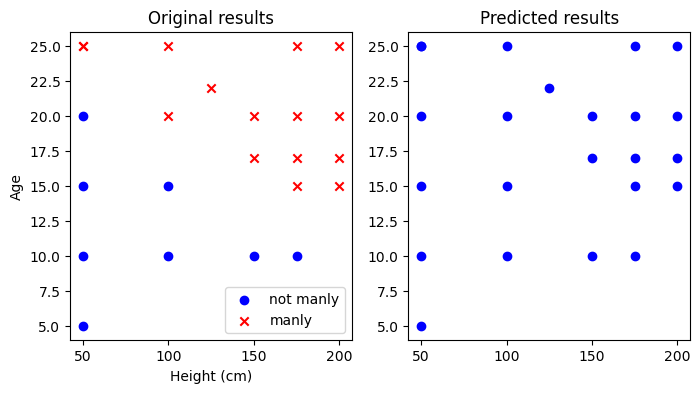

In [30]:
# Scatter original data and predictions next to each other.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

axs[0].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[0].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[0].set_ylabel('Age')
axs[0].set_xlabel('Height (cm)')
axs[0].legend(loc='lower right')
axs[0].set_title('Original results')

# Scatter plot the predicted results.

group0 = trainingFeatures[predictions >= 0.5]
group1 = trainingFeatures[predictions < 0.5]

axs[1].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[1].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[1].set_title('Predicted results')

plt.show()

In [123]:
# In the 2nd try we defined a "more visible" boundary between 0s and 1s, and yet the algorithm behaved even worse - this time went completely wrong.
# Which suggests there's some bug in the code maybe.